In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/My Drive/ML_PROJECT

/content/drive/.shortcut-targets-by-id/1-ZTw4MSWOQcdu6QvytRZyQb-Ws3UAU7A/ML_PROJECT


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import random
import os
import shutil

In [2]:
import sys 
sys.path.append("/content/drive/MyDrive/ML_PROJECT")
from generate_data import get_data_generator

In [7]:
training_data,validation_data,testing_data=get_data_generator()
print(" training dataset : ", len(training_data))
print(" testing dataset : ", len(testing_data))
print(" validation dataset :", len(validation_data))


Found 5520 images belonging to 2 classes.
Found 2207 images belonging to 2 classes.
Found 20667 images belonging to 2 classes.
 training dataset :  646
 testing dataset :  173
 validation dataset : 69


In [8]:
from keras.callbacks import CSVLogger
len(training_data)

646

In [9]:
from tensorflow.keras.layers import Input,  Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D



In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add( Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add( Dropout(0.4))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)       

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import keras
from keras.callbacks import CSVLogger


In [ ]:
csv_logger = CSVLogger('custom_training_dropout.log', separator=',', append=False)
History = model.fit( 
    training_data, 
    validation_data = validation_data, 
    epochs = 30, 
    steps_per_epoch = len(training_data),
    validation_steps = len(validation_data),
    callbacks=[csv_logger]
    )
model.save('custom_saved_model_dropout')

Epoch 1/30
646/646 [==============================] - 11030s 17s/step - loss: 0.3878 - accuracy: 0.8363 - val_loss: 0.2600 - val_accuracy: 0.9130
Epoch 2/30
646/646 [==============================] - 249s 386ms/step - loss: 0.2157 - accuracy: 0.9338 - val_loss: 0.1755 - val_accuracy: 0.9443
Epoch 3/30
646/646 [==============================] - 245s 380ms/step - loss: 0.2016 - accuracy: 0.9387 - val_loss: 0.1717 - val_accuracy: 0.9488
Epoch 4/30
646/646 [==============================] - 244s 377ms/step - loss: 0.1818 - accuracy: 0.9454 - val_loss: 0.1789 - val_accuracy: 0.9474
Epoch 5/30
646/646 [==============================] - 240s 372ms/step - loss: 0.1755 - accuracy: 0.9479 - val_loss: 0.1530 - val_accuracy: 0.9511
Epoch 6/30
646/646 [==============================] - 231s 357ms/step - loss: 0.1795 - accuracy: 0.9471 - val_loss: 0.1651 - val_accuracy: 0.9515
Epoch 7/30
646/646 [==============================] - 237s 367ms/step - loss: 0.1661 - accuracy: 0.9494 - val_loss: 0.1671 -

In [ ]:
# evaluating custom model
testing_data.reset()
predictions = model.predict(testing_data, steps = len(testing_data))
# index of the label with largest predicted probability of each testing image
predictions = np.argmax(predictions, axis=1)


In [ ]:
print( classification_report(testing_data.classes, predictions, target_names= testing_data.class_indices.keys()))

              precision    recall  f1-score   support

 Parasitized       0.98      0.92      0.95      2728
  Uninfected       0.93      0.98      0.95      2792

    accuracy                           0.95      5520
   macro avg       0.95      0.95      0.95      5520
weighted avg       0.95      0.95      0.95      5520



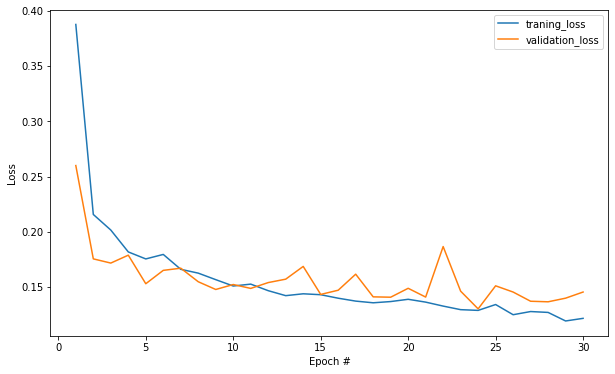

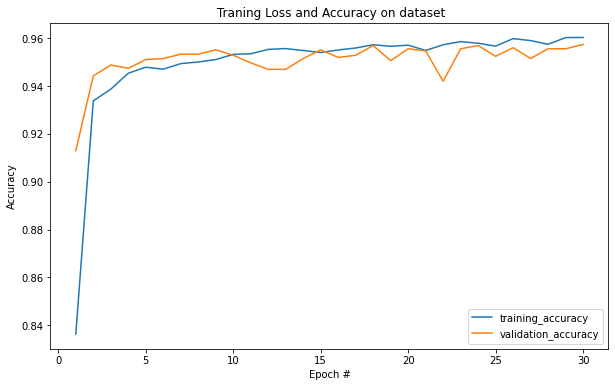

In [ ]:
# ploting training loss and accuracy
import numpy
N = 30 #number of epochs
num = []
for i in range(1, 31):
  num.append(i)
plt.figure(figsize=(10, 6))
plt.plot(num, History.history["loss"], label ="traning_loss")
plt.plot(num, History.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend(loc ='upper right')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(num, History.history['accuracy'], label='training_accuracy')
plt.plot(num, History.history['val_accuracy'], label = 'validation_accuracy')
plt.title(' Traning Loss and Accuracy on dataset')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')
plt.show()

